# Model version control and experiment tracking

In [33]:
# Import libraries
import csv
import pandas as pd
import sklearn
import nltk
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import string
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prachi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/prachi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prachi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/prachi/nltk_data...


In [75]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
val_data = pd.read_csv("./data/validation.csv")

X_train = train.drop('class', axis=1)["sms"]
y_train = train['class'].map({'ham': 0, 'spam': 1})
X_val = val.drop('class', axis=1)["sms"]
y_val = val['class'].map({'ham': 0, 'spam': 1})
X_test = test.drop('class', axis=1)["sms"]
y_test = test['class'].map({'ham': 0, 'spam': 1})

In [57]:
X_train.head()

0    Dont show yourself. How far. Put new pictures ...
1    Dont forget you can place as many FREE Request...
2                          K, can that happen tonight?
3                         Am slow in using biola's fne
4                 Leave it. U will always be ignorant.
Name: sms, dtype: object

# Preprocess the dataset

In [43]:
stop_words = set(stopwords.words('english'))
def preprocess_sms(message):
    global stop_words
    # message = message.lower() #converting to lowercase
    message = message.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    words = word_tokenize(message) #tokenize
    words = [word for word in words if word.isalnum() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

In [87]:
## k-NN 
knn = make_pipeline(CountVectorizer(), KNeighborsClassifier())
knn.fit(X_train, y_train)

# Val predictions
y_val_predict = knn.predict(X_val)


Accuracy for validation data for k-NN: 0.9126794258373205
Confusion Matrix:
[[722   1]
 [ 72  41]]


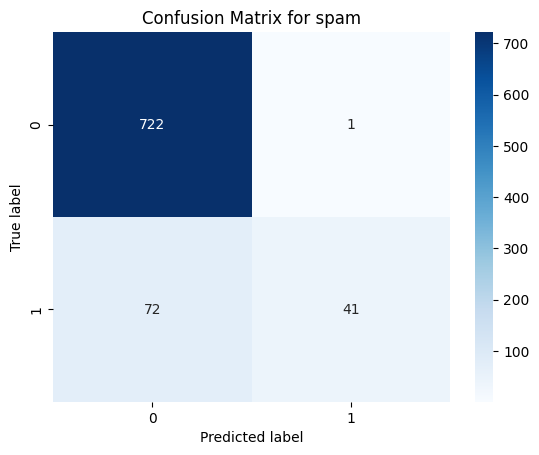

False Positive Rate: 0.13831258644536654%
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       723
           1       0.98      0.36      0.53       113

    accuracy                           0.91       836
   macro avg       0.94      0.68      0.74       836
weighted avg       0.92      0.91      0.89       836



In [88]:
accuracy_val = accuracy_score(y_val, y_val_predict)
print(f"Accuracy for validation data for k-NN: {accuracy_val}")

con_matrix_val = confusion_matrix(y_val, y_val_predict)
print('Confusion Matrix:')
print(con_matrix_val)

sns.heatmap(con_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for spam')
plt.show()

TN = con_matrix_val[0, 0]
FP = con_matrix_val[0, 1]
FN = con_matrix_val[1, 0]
TP = con_matrix_val[1, 1]
false_pos_rate = FP / (FP + TN) * 100
print(f"False Positive Rate: {false_pos_rate}%")

print(classification_report(y_val, y_val_predict))

In [89]:
## naiveBayes
naiveBayes = make_pipeline(CountVectorizer(), MultinomialNB())
naiveBayes.fit(X_train, y_train)

# Val predictions
y_val_predict_2 = naiveBayes.predict(X_val)


Accuracy of validation data for Naive Bayes: 0.9832535885167464
Confusion Matrix:
[[720   3]
 [ 11 102]]


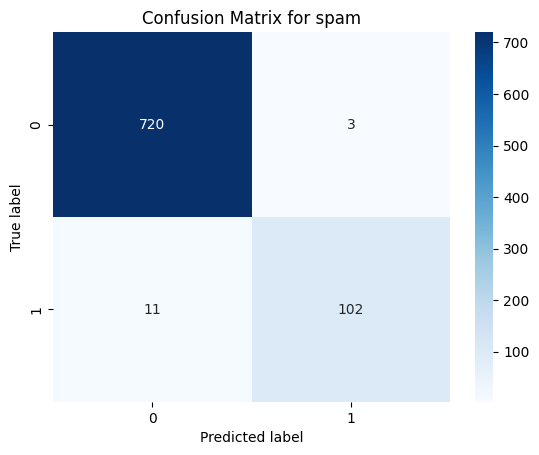

False Positive Rate: 0.4149377593360996%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       723
           1       0.97      0.90      0.94       113

    accuracy                           0.98       836
   macro avg       0.98      0.95      0.96       836
weighted avg       0.98      0.98      0.98       836



In [90]:
accuracy_val_2 = accuracy_score(y_val, y_val_predict_2)
print(f"Accuracy of validation data for Naive Bayes: {accuracy_val_2}")

con_matrix_val_2 = confusion_matrix(y_val, y_val_predict_2)
print('Confusion Matrix:')
print(con_matrix_val_2)

sns.heatmap(con_matrix_val_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for spam')
plt.show()

TN = con_matrix_val_2[0, 0]
FP = con_matrix_val_2[0, 1]
FN = con_matrix_val_2[1, 0]
TP = con_matrix_val_2[1, 1]
false_pos_rate = FP / (FP + TN) * 100
print(f"False Positive Rate: {false_pos_rate}%")

print(classification_report(y_val, y_val_predict_2))

In [91]:
## naiveBayes
svm = make_pipeline(CountVectorizer(), SVC(kernel='linear'))
svm.fit(X_train, y_train)

# Val predictions
y_val_predict_3 = svm.predict(X_val)


Accuracy of validation data for SVM: 0.9820574162679426
Confusion Matrix:
[[722   1]
 [ 14  99]]


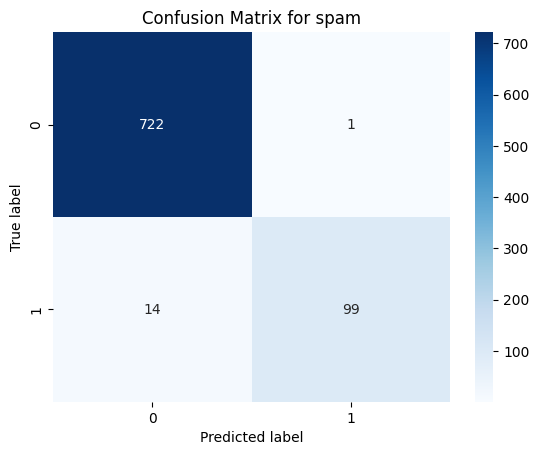

False Positive Rate: 0.13831258644536654%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       723
           1       0.99      0.88      0.93       113

    accuracy                           0.98       836
   macro avg       0.99      0.94      0.96       836
weighted avg       0.98      0.98      0.98       836



In [92]:
accuracy_val_3 = accuracy_score(y_val, y_val_predict_3)
print(f"Accuracy of validation data for SVM: {accuracy_val_3}")

con_matrix_val_3 = confusion_matrix(y_val, y_val_predict_3)
print('Confusion Matrix:')
print(con_matrix_val_3)

sns.heatmap(con_matrix_val_3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for spam')
plt.show()

TN = con_matrix_val_3[0, 0]
FP = con_matrix_val_3[0, 1]
FN = con_matrix_val_3[1, 0]
TP = con_matrix_val_3[1, 1]
false_pos_rate = FP / (FP + TN) * 100
print(f"False Positive Rate: {false_pos_rate}%")

print(classification_report(y_val, y_val_predict_3))

In [93]:
def test_model(model, X, Y):
    y_pred = model.predict(X)

    output = {
        'Accuracy(Spam)': accuracy_score(Y, y_pred),
        'Precision(Spam)': precision_score(Y, y_pred, pos_label=1),
        'Recall(Spam)': recall_score(Y, y_pred, pos_label=1),
        'F1 Score(Spam)': f1_score(Y, y_pred, pos_label=1)
    }
    TN, FP, _, _ = confusion_matrix(Y, y_pred).ravel()
    output["FPR"] = FP / (FP + TN) * 100
    return output

result_knn = test_model(knn, X_test, y_test)
result_naiveBayes = test_model(naiveBayes, X_test, y_test)
result_svm = test_model(svm, X_test, y_test)

if result_knn["FPR"] < result_naiveBayes["FPR"] and result_knn["FPR"] <  result_svm["FPR"]:
    best_result = result_knn
    best_model = knn

elif result_naiveBayes["FPR"] < result_svm["FPR"]:
    best_result = result_naiveBayes
    best_model = naiveBayes
else:
    best_result = result_svm
    best_model = svm

In [94]:
print(result_knn)
print(result_naiveBayes)
print(result_svm)     

{'Accuracy(Spam)': 0.9163679808841099, 'Precision(Spam)': 1.0, 'Recall(Spam)': 0.33962264150943394, 'F1 Score(Spam)': 0.5070422535211268, 'FPR': np.float64(0.0)}
{'Accuracy(Spam)': 0.98805256869773, 'Precision(Spam)': 0.98, 'Recall(Spam)': 0.9245283018867925, 'F1 Score(Spam)': 0.9514563106796117, 'FPR': np.float64(0.27359781121751026)}
{'Accuracy(Spam)': 0.980884109916368, 'Precision(Spam)': 0.9787234042553191, 'Recall(Spam)': 0.8679245283018868, 'F1 Score(Spam)': 0.92, 'FPR': np.float64(0.27359781121751026)}


In [95]:
if result_knn["F1 Score(Spam)"] > result_naiveBayes["F1 Score(Spam)"] and result_knn["F1 Score(Spam)"] >  result_svm["F1 Score(Spam)"]:
    best_result = result_knn
    best_model = knn

elif result_naiveBayes["F1 Score(Spam)"] > result_svm["F1 Score(Spam)"]:
    best_result = result_naiveBayes
    best_model = naiveBayes
else:
    best_result = result_svm
    best_model = svm

print("Best model is:", best_model)

Best model is: Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])


In [96]:
import pickle

# save the model
filename = 'best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))